# HW 2: SVD and PCA for Machine Learning

## Visualizing dyad
Consider an image from `skimage.data`. For simplicity, say that $X \in \mathbb{R}^{m \times n}$ is the matrix representing that image. You are asked to visualize the dyad of the SVD Decomposition of $X$ and the result of compressing the image via SVD. In particular:

* Load the image into memory and compute its SVD;
* Visualize some of the dyad $\sigma_i u_i v_i^T$ of this decomposition. What do you notice?
* Plot the singular values of $X$. Do you note something?
* Visualize the $k$-rank approximation of $X$ for different values of $k$. What do you observe?
* Compute and plot the approximation error $|| X − X_k ||_F$ for increasing values of $k$, where $X_k$ is the $k$-rank approximation of $k$.
* Plot the compression factor: $c_k = 1 − \frac{k(m+n+1)}{mn}$ for increasing values of $k$.
* Compute the value $k$ such that $c_k = 0$ (i.e. when the compressed image requires the same amount of informations of those of the uncompressed image). What is the approximation error for this value of $k$? Comment.

It is strongly recommended (but not mandatory) to consider a grey-scale image for this exercise. You can also use an image downloaded from the web. Clearly, if your image will be an RGB image, then its shape will be `(m, n, 3)`, where the last dimension corresponds to the three channels (Red, Green, and Blue). Every point discussed in the Homework has to be done on each channel separately, and then aggregated back to an RGB image.

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_float

(512, 512)


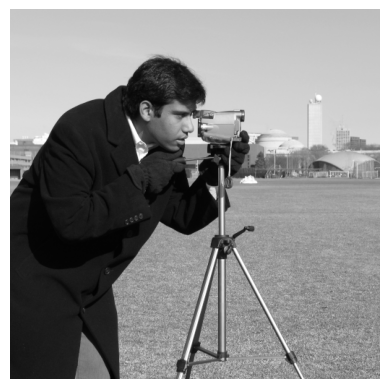

In [128]:
# Load the image and convert it to grayscale
image = img_as_float(data.camera())
print(image.shape)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

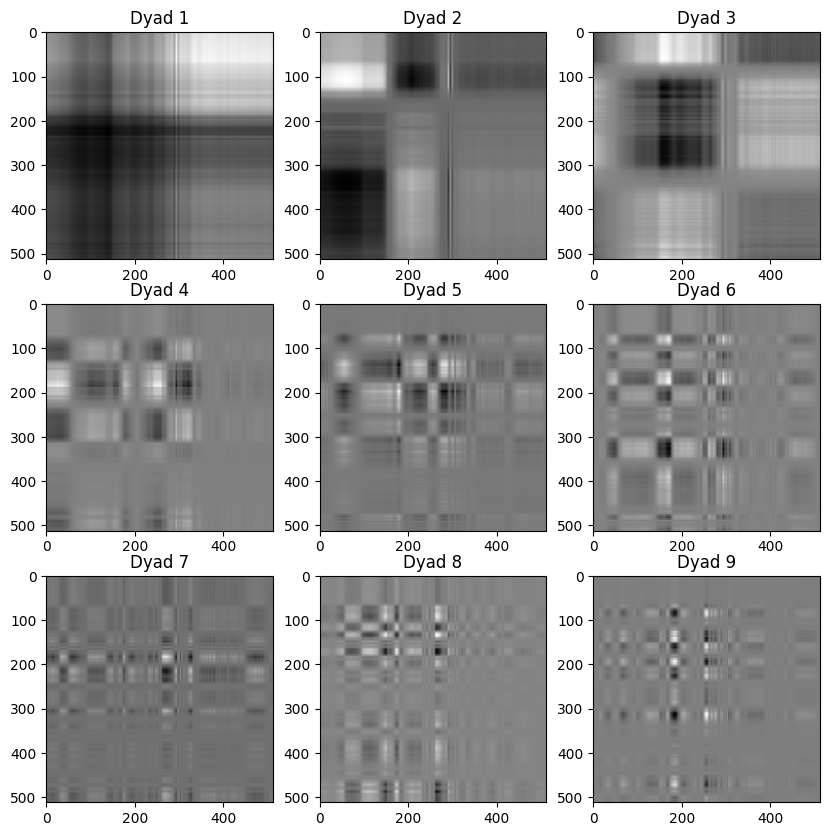

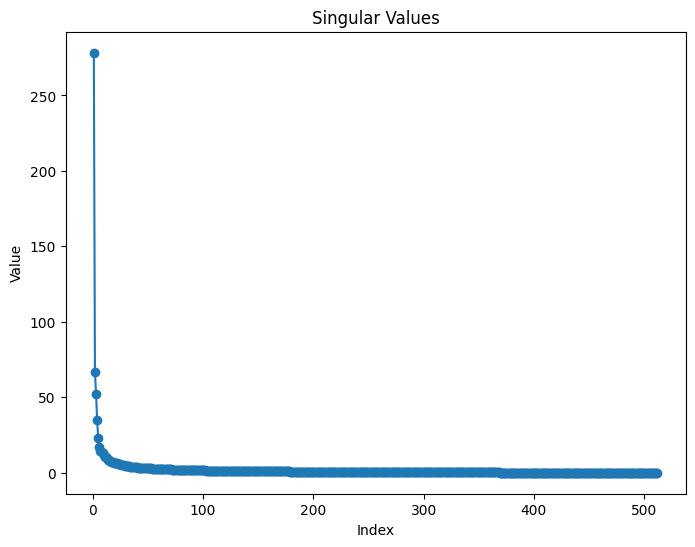

In [129]:


# Compute the SVD of the image
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Visualize some of the dyad σ_i u_i v_i^T of this decomposition
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    dyad = S[i] * np.outer(U[:, i], VT[i, :])
    ax.imshow(dyad, cmap='gray')
    ax.set_title(f'Dyad {i+1}')
plt.show()

# Plot the singular values of X
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(1, len(S), len(S)), S, 'o-')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

> We notice that with increasing order of dyad the details/features of the image are smaller. This means that, even with only a little amount of dyads, we can approximate the original image with "high" accuracy.

> The singular values follows an exponential distribution.
A lot of them are near (equal) to zero, this may mean that the image can be approximated with a very low rank matrix.

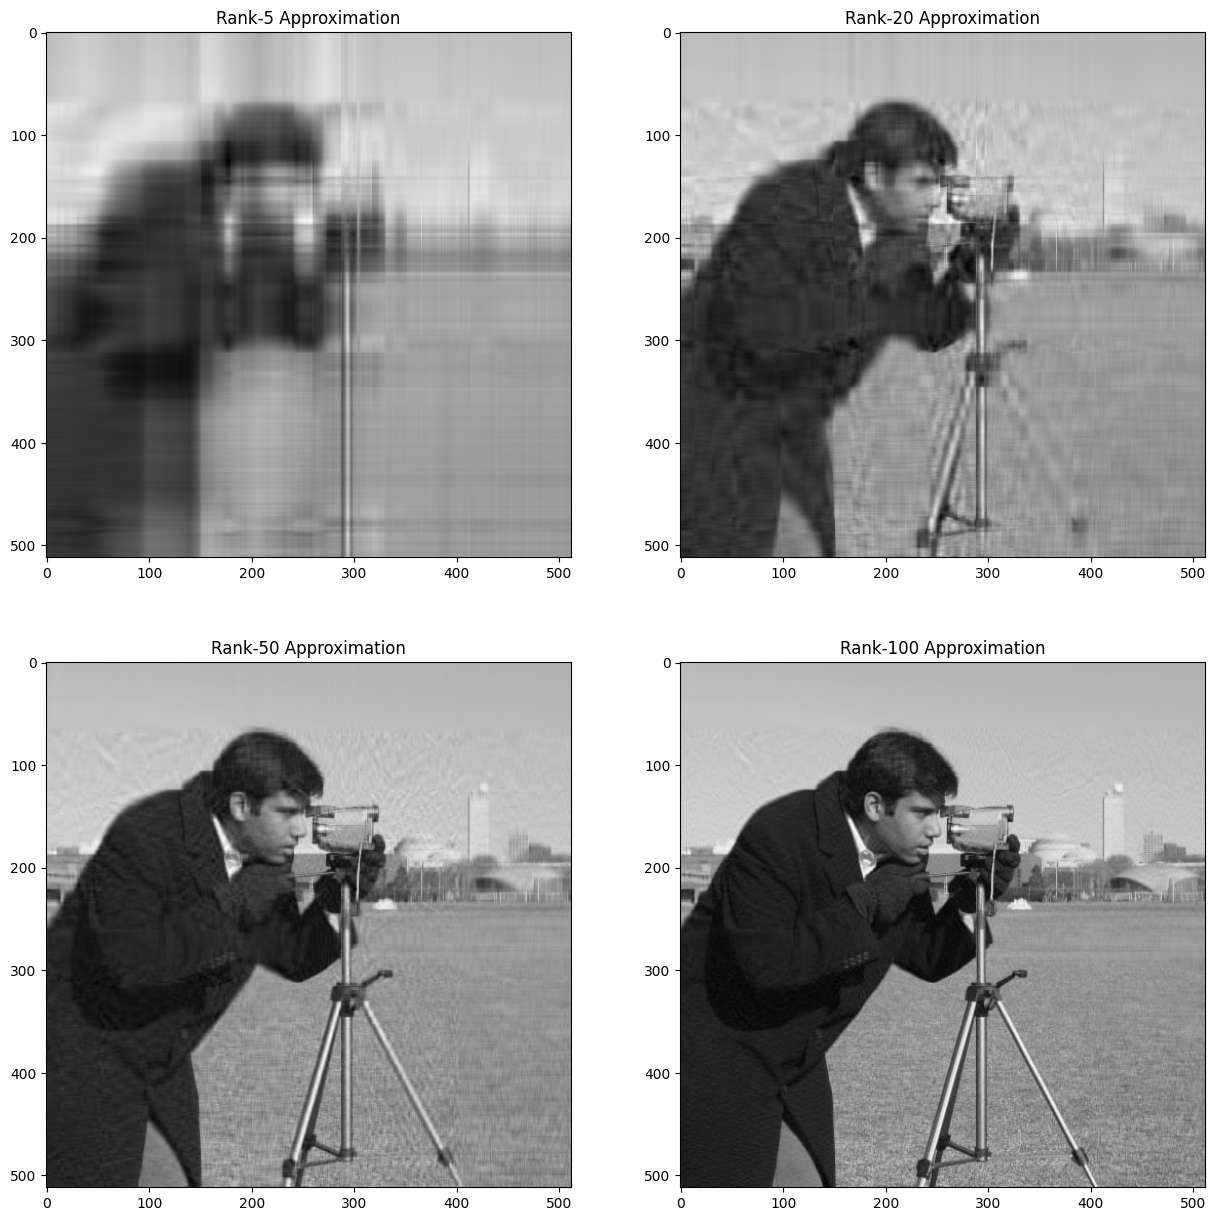

In [130]:
# Visualize the k-rank approximation of X for different values of k
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flat
for i, k in enumerate([5, 20, 50, 100]):
    X_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))
    axes[i].imshow(X_k, cmap='gray')
    axes[i].set_title(f'Rank-{k} Approximation')
plt.show()

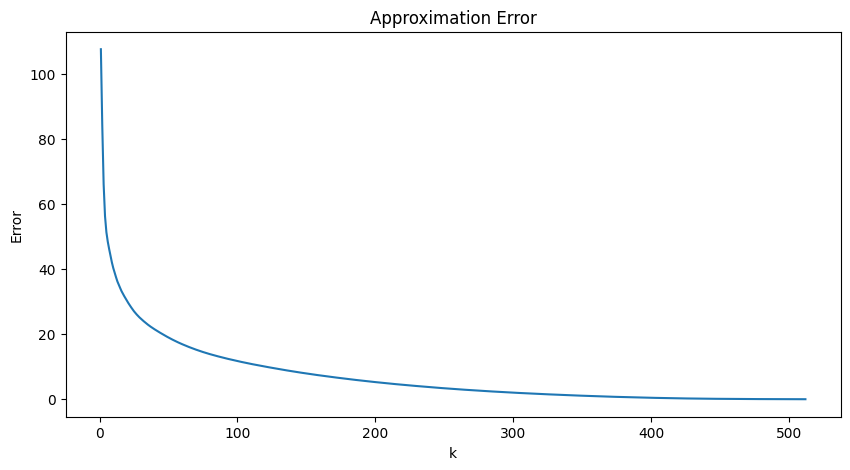

In [131]:
# Compute and plot the approximation error || X − X_k ||_F for increasing values of k

errors = []
range_of_k = range(1, image.shape[0] + 1)
for k in range_of_k:
    X_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))
    error = np.linalg.norm(image - X_k, 'fro')
    errors.append(error)

plt.figure(figsize=(10, 5))
plt.plot(range_of_k, errors)
plt.title('Approximation Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

> We previously plotted the singular values, and we know that the k-th approximation error is equal to the (k+1)-th singular value (in fact the coordinates of the first singular value is not in the plot), so the plot must be the same for increasing values of k.

k such that c_k = 1: 255.75024390243902
Approximation error for k = 255.75024390243902: 3.1789111238422825


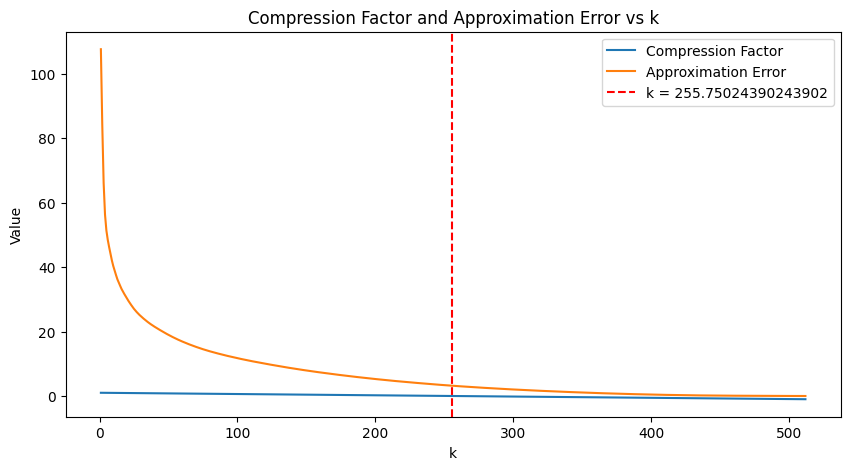

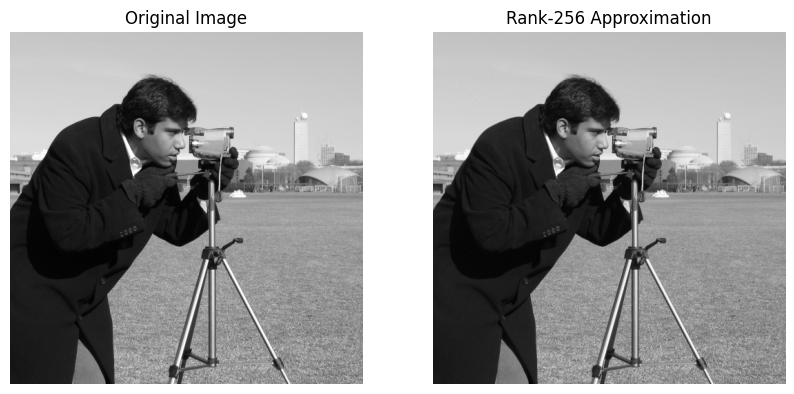

In [132]:
# Plot the compression factor: c_k = 1 − (k(m+n+1))/(mn) for increasing values of k
from sys import orig_argv


m, n = image.shape
compression_factors = [1 - (k * (m + n + 1)) / (m * n) for k in range_of_k]

# Compute the value k such that c_k = 1 and the approximation error for this value of k
k_one = (m * n) / (m + n + 1)
X_k_one = np.dot(U[:, : round(k_one)], np.dot(np.diag(S[:round(k_one)]), VT[:round(k_one), :]))
error_k_one = np.linalg.norm(image - X_k_one, 'fro')
print(f'k such that c_k = 1: {k_one}')
print(f'Approximation error for k = {k_one}: {error_k_one}')
# Compare the original image weights with the weights of the rank-k approximation

plt.figure(figsize=(10, 5))
plt.plot(range_of_k, compression_factors, label='Compression Factor')
plt.plot(range_of_k, errors, label='Approximation Error')
plt.axvline(x=k_one, color='r', linestyle='--', label=f'k = {k_one}')
plt.title('Compression Factor and Approximation Error vs k')
plt.xlabel('k')
plt.ylabel('Value')
plt.legend()
plt.show()

# Visualize the image for k = k_one and compare it with the original image (subplots)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X_k_one, cmap='gray')
plt.title(f'Rank-{round(k_one)} Approximation')
plt.axis('off')
plt.show()


>What is the approximation error when the compressed image requires the same amount of informations of those of the uncompressed image (i.e. ck = 1)?    
Whe can simply find k when ck=1 and compute the k-rank approximation

>We see that the approximation error is very low, and we obtain a very good approximation with a matrix with a rank of an half of the original one. <br>
Looking at the two curves, we observe that the red point is relatively close to the trade-off value between the approximation error and the compression factor.

## Classification of MNIST Digits with SVD Decomposition.
For this exercise we aim to develop a classification algorithm on MNIST digits using SVD decomposition.
We recall that, given a matrix $X \in \mathbb{R}^{d \times N}$ and its SVD decomposition $X = USV^T$, it is easy to show that an orthogonal basis for the space of the columns is given by the first $p$ columns of the matrix $U$, where $p = rank(X)$ is equal to the number of non-zero singular values of $X$. We will make use of the space of the columns defined by the $U$ matrix and the following Theorem:

**Theorem 1.** Let $W$ be a subspace of $\mathbb{R}^d$ with $dim W = s$, and let ${w_1, \dots, w_s}$ be an orthogonal basis of $W$. Then, for any $x \in \mathbb{R}^d$, the projection $x^\perp$ of $x$ onto $W$ has the following form:

$$
x^\perp = \frac{x \cdot w_1}{w_1 \cdot w_1} w_1 + \dots + \frac{x \cdot w_s}{w_s \cdot w_s} w_s.
$$

**Corollary 1.1.** Let $X \in \mathbb{R}^{d \times N}$ be a matrix with SVD decomposition $X = USV^T$, since $p = rank(X)$ is the dimension of the space defined by the columns of $X$ and the columns of $U$, ${u_1, \dots, u_p}$ are an orthonormal basis for that space, the projection of an $d$-dimensional vector $x$ on this space can be easily
computed as:

$$
x^\perp = U(U^T x).
$$

Consider as an example a binary classification problem, where we want to distinguish between hand-written digit representing numbers 3 and 4. We will refer to the class of the images representing number 3 as $C_1$, and to the set of images representing the number 4 as $C_2$. Let $N_1$ be the number of elements in $C_1$, and $N_2$ be the number of elements in $C_2$. Let $X_1 \in \mathbb{R}^{d \times N_1}$ be the matrix such that its columns are a flatten version of each digit in $C_1$, $X_2 \in \mathbb{R}^{d \times N_2}$ be the matrix such that its columns are a flatten version of each digit in $C_2$, and consider:

$$
X_1 = U_1S_1V_1^T, \\
X_2 = U_2S_2V_2^T,
$$

the SVD decomposition of the two matrices.

If $x \in \mathbb{R}^{d}$ is a new, unknown digit, we can predict its class through our classification algorithm by projecting it onto the spaces induced by the SVD of $X_1$ and $X_2$ via:

$$
x_1^\perp = U_1(U_1^T x), \\
x_2^\perp = U_2(U_2^T x),
$$

and classify $x$ as an element of either $C_1$ or $C_2$ based on $||x − x_1^\perp ||_2$ being greater of lower than $||x−x_2^\perp ||_2$, respectively. In this exercise, you are required to implement this idea in Python.

> The description provided up to this point is only meant to understand the basic idea of the algorithm we aim to implement. From now on, I will list the point you are effectively required to implement in Python, therefore I will start re-defining some quantities, possibly overlapping with some discussion already made.

1. Implement the binary classification algorithm discussed above for the digits 3 and 4 of MNIST dataset. Follow these steps:
   * Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://www.kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the [PCA class](https://devangelista2.github.io/statistical-mathematical-methods/ML/PCA.html). When loaded into memory, this dataset appear as an array with shape $42000 \times 785$ , containining the flattened version of $42000$ $28 \times 28$ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix `X` containing the flattenened digits, with shape `(784, 42000)`, and a vector `Y` of the associated digit value, with a shape of `(42000,)`.
   * Write a function taking as input an index value `idx` and visualizes the image of `X` in the corresponding index (i.e. `X[idx, :]`). Use the function `plt.imshow`.
   * Filter from `X` only those elements that corresponds to digits 3 or 4. This can be done, for example, by using the boolean slicing of `numpy` arrays, as already discussed in class.
   * Split the obtained dataset in training and testing in a proportion of $80 : 20$. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.
   * Call `X1` and `X2` the submatrices of the training set, filtered by the two selected digits, corresponding to those element associated with number 3 (class `C1`), and with number 4 (class `C2`).
   * Compute the SVD decomposition of `X1` and `X2` with `np.linalg.svd(matrix, full_matrices=False)` and denote the $U$-part of the two decompositions as `U1` and `U2`.
   * Take an unknown digit $x$ from the test set, and compute $x_1^\perp = U_1(U_1^T x)$ and $x_2^\perp = U_2(U_2^T x)$.
   * Compute the distances $d_1 = || x − x_1^\perp ||_2$ and $d_2 = || x − x_2^\perp||_2$, and classify $x$ as $C_1$ if $d_1 < d_2$, as $C_2$ if $d_2 < d_1$.
   * Repeat the experiment for different values of $x$ in the test set. Compute the misclassification rate for this algorithm.
   * Repeat the experiment for different digits other than 3 or 4. There is a relationship between the visual similarity of the digits and the classification error?
   * Comment the obtained results.

Given a classification algorithm $f(x)$, which maps an input image $x$ into its predicted class, the misclassification rate on the test set is defined as:

$$
MR = \frac{1}{N_{test}} \sum_{i=1}^{N_test} \iota(f(x_i) == y_i),
$$

where $N_{test}$ is the number of elements in the test set, $(x_i, y_i)$ represents the $i$-th element of the test set, while $\iota(f(x_i) == y_i)$ is a function which is equal to 0 if $f(x_i)$ is equal to the true class $y_i$, while it is equal to 1 if $f(x_i)$ guesses the wrong digit (i.e. it is different from $y_i$). More simply, the Misclassification Rate represent the average number of error of the model over the test set.

2. The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, $k$ different classes) $C_1, \dots, C_k$, we just need to repeat the same procedure as before for each matrix $X_1, \dots, X_k$ to obtain the distances $d_1, \dots, d_k$. Then, the new digit $x$ from the test set will be classified as $C_i$ if $d_i$ is lower that $d_j$ for each $j = 1,...,k$. Repeat the exercise above with a 3-digit example. Comment the differences.

In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import kagglehub

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


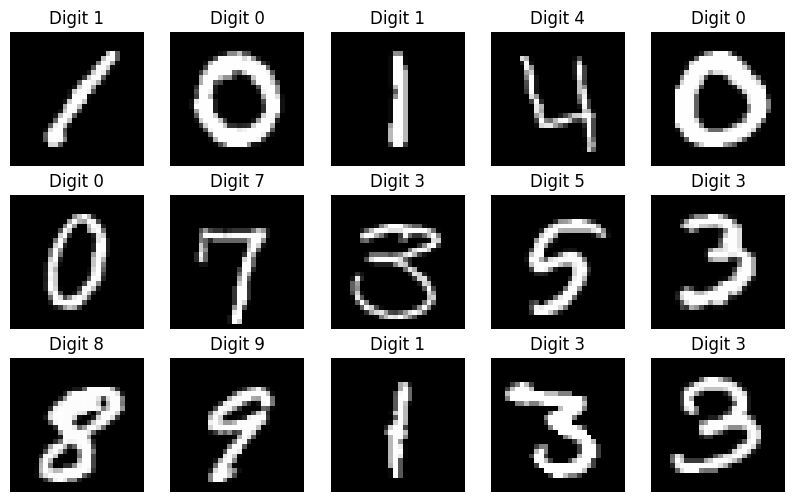

In [134]:
# Download latest version
path = kagglehub.dataset_download("animatronbot/mnist-digit-recognizer")

# Load the MNIST dataset
mnist = pd.read_csv(f"{path}/train.csv")
mnist.info()

X = mnist.iloc[:, 1:].values  # Flattened digits
Y = mnist.iloc[:, 0].values  # Digit values

# Visualize some of the digits
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Digit {Y[i]}')

In [135]:
# Filter digits 3 and 4
mask = (Y == 3) | (Y == 4)
X_filtered = X[mask]
Y_filtered = Y[mask]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.2, random_state=42)
X_train = X_train.T
X_test = X_test.T

# Separate the training set into digits 3 and 4
X1 = X_train[:, Y_train == 3]
X2 = X_train[:, Y_train == 4]

# Compute the SVD of X1 and X2
U1, _, _ = np.linalg.svd(X1, full_matrices=False)
U2, _, _ = np.linalg.svd(X2, full_matrices=False)

# Classification function
def classify_digit(x):
    x1_perp = U1 @ (U1.T @ x)
    x2_perp = U2 @ (U2.T @ x)
    d1 = np.linalg.norm(x - x1_perp)
    d2 = np.linalg.norm(x - x2_perp)
    return 3 if d1 < d2 else 4


Misclassification Rate: 0.06231454005934722
Number of missclassified digits: 105
Number of test digits: 1685
Percentage of missclassified digits: 6.23%


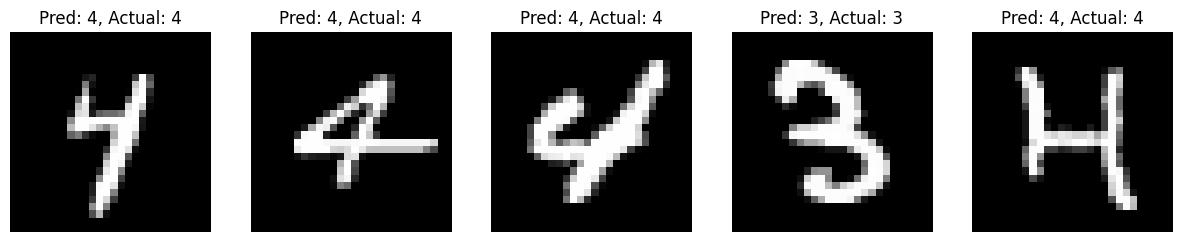

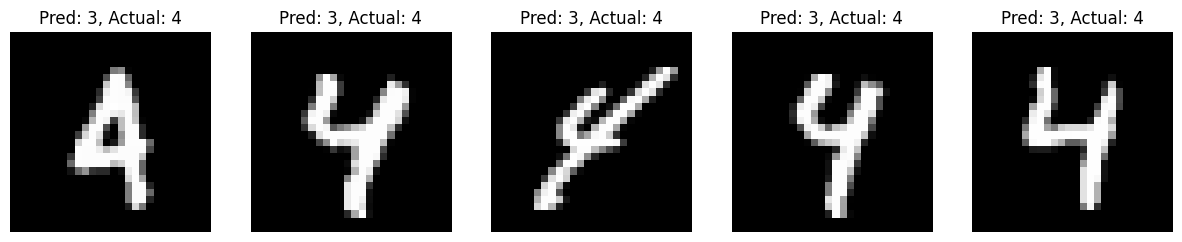

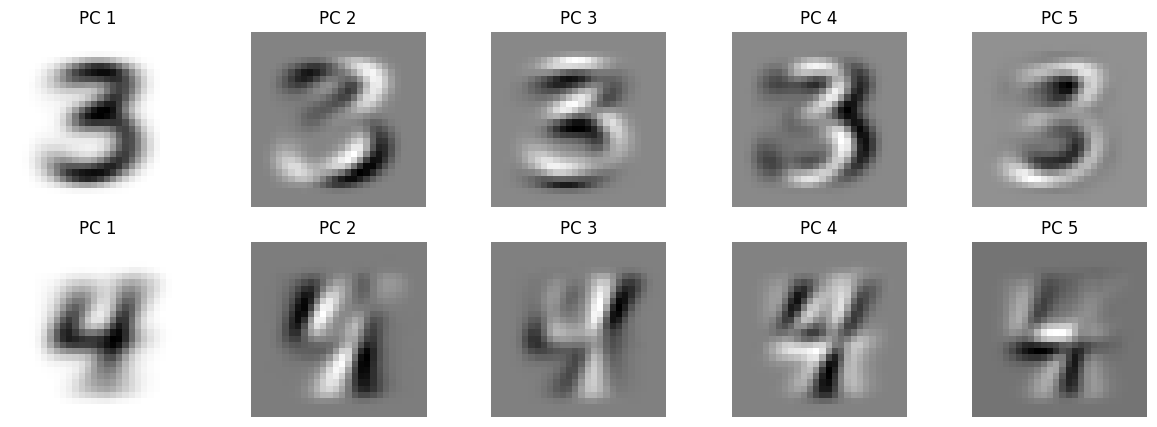

In [136]:
# Predict and compute the misclassification rate
Y_pred = np.array([classify_digit(X_test[:, i]) for i in range(X_test.shape[1])])
misclassification_rate = 1 - accuracy_score(Y_test, Y_pred)
print(f'Misclassification Rate: {misclassification_rate}')

number_missclassified = np.sum(Y_test != Y_pred)
print(f'Number of missclassified digits: {number_missclassified}')
print(f'Number of test digits: {len(Y_test)}')
print(f'Percentage of missclassified digits: {number_missclassified / len(Y_test) * 100:.2f}%')

# Create a subplot to visualize some test images and their predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax in axes:
    i = np.random.randint(X_test.shape[1])
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {Y_pred[i]}, Actual: {Y_test[i]}')
    ax.axis('off')
plt.show()

# Visualize the wrong predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax in axes:
    i = np.random.choice(np.where(Y_test != Y_pred)[0])
    ax.imshow(X_test[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {Y_pred[i]}, Actual: {Y_test[i]}')
    ax.axis('off')

# Visualize the first 5 principal components of X1 and X2
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i, ax in enumerate(axes[0]):
    ax.imshow(U1[:, i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'PC {i+1}')
for i, ax in enumerate(axes[1]):
    ax.imshow(U2[:, i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'PC {i+1}')
plt.show()


In [137]:
# Repeat the classification experiment for different digits
def classify_digits_SVD(digit1, digit2):
    mask = (Y == digit1) | (Y == digit2)
    X_filtered = X[mask]
    Y_filtered = Y[mask]

    X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.2, random_state=42)
    X_train = X_train.T
    X_test = X_test.T

    X1 = X_train[:, Y_train == digit1]
    X2 = X_train[:, Y_train == digit2]

    U1, _, _ = np.linalg.svd(X1, full_matrices=False)
    U2, _, _ = np.linalg.svd(X2, full_matrices=False)

    def classify_digit(x):
        x1_perp = U1 @ (U1.T @ x)
        x2_perp = U2 @ (U2.T @ x)
        d1 = np.linalg.norm(x - x1_perp)
        d2 = np.linalg.norm(x - x2_perp)
        return digit1 if d1 < d2 else digit2

    Y_pred = np.array([classify_digit(X_test[:, i]) for i in range(X_test.shape[1])])
    misclassification_rate = np.sum(Y_test != Y_pred) / len(Y_test)

    return misclassification_rate, Y_test, Y_pred

digits = [(i, j) for i in range(10) for j in range(i+1, 10)]
misclassification_rates, Y_tests, Y_preds = [], [], []
for digit1, digit2 in digits:
    misclassification_rate, Y_test, Y_pred = classify_digits_SVD(digit1, digit2)
    misclassification_rates.append(misclassification_rate)
    Y_tests.append(Y_test)
    Y_preds.append(Y_pred)

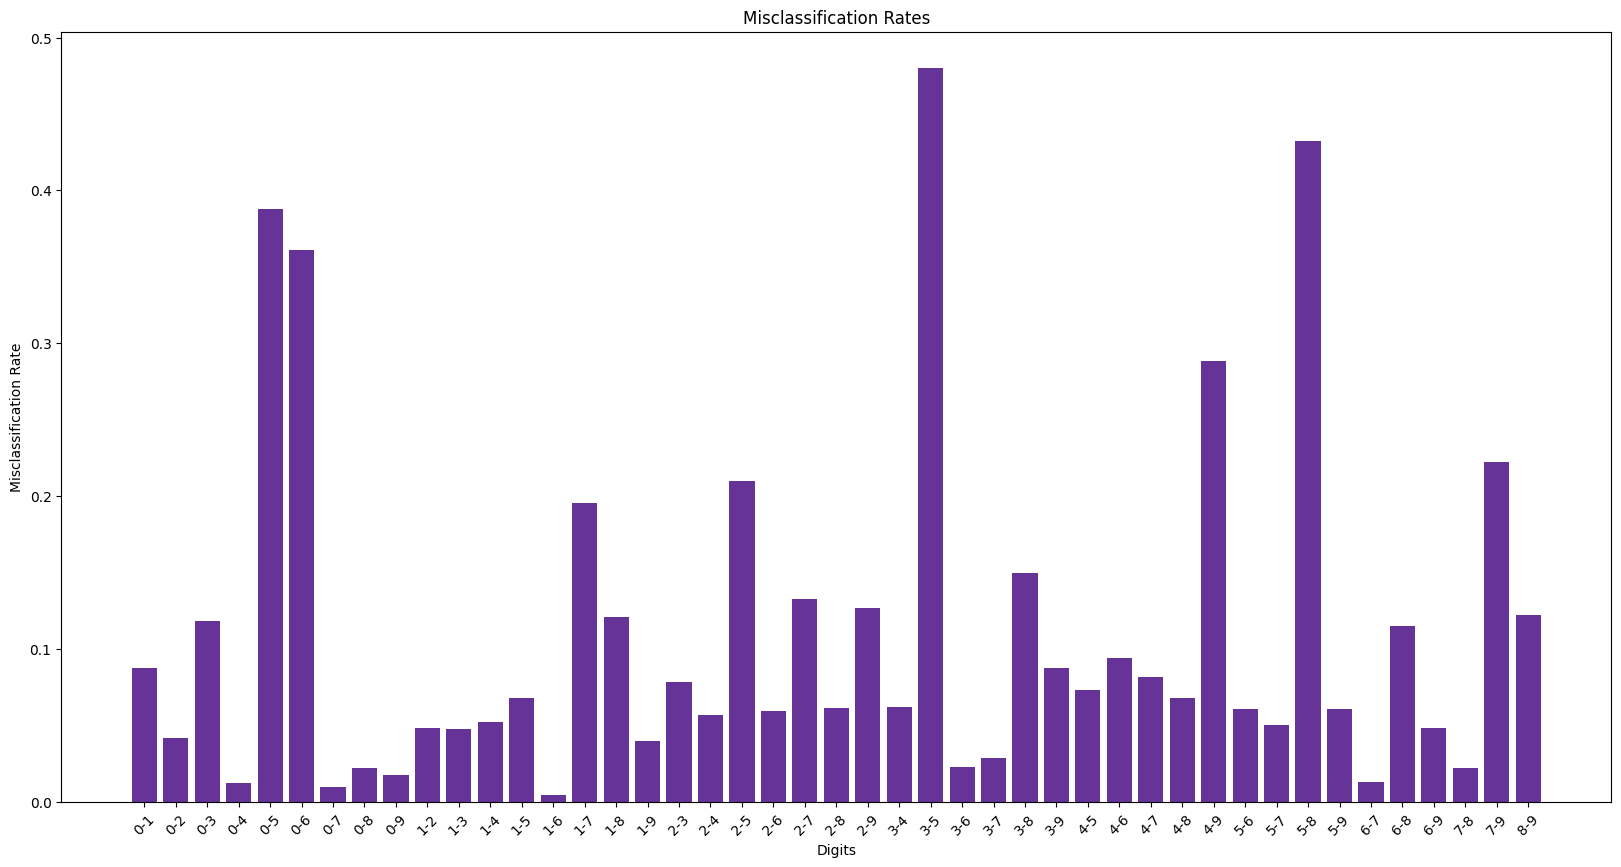

In [138]:
# Visualize the misclassification rates
plt.figure(figsize=(20, 10))
plt.bar(range(len(digits)), misclassification_rates, color='rebeccapurple')
plt.xticks(range(len(digits)), [f'{d1}-{d2}' for d1, d2 in digits], rotation=45)
plt.title('Misclassification Rates')
plt.xlabel('Digits')
plt.ylabel('Misclassification Rate')
plt.show()

In [139]:
# Identify the couple of digits that perform the worst in the classification task
worst_performing_digits = sorted(zip(digits, misclassification_rates), key=lambda x: x[1], reverse=True)

# Print the worst performing digits and their misclassification rates
for (digit1, digit2), rate in worst_performing_digits[: 15]:
    print(f'Digits: {digit1}-{digit2}, Accuracy: {1 - rate:.2f}')

Digits: 3-5, Accuracy: 0.52
Digits: 5-8, Accuracy: 0.57
Digits: 0-5, Accuracy: 0.61
Digits: 0-6, Accuracy: 0.64
Digits: 4-9, Accuracy: 0.71
Digits: 7-9, Accuracy: 0.78
Digits: 2-5, Accuracy: 0.79
Digits: 1-7, Accuracy: 0.80
Digits: 3-8, Accuracy: 0.85
Digits: 2-7, Accuracy: 0.87
Digits: 2-9, Accuracy: 0.87
Digits: 8-9, Accuracy: 0.88
Digits: 1-8, Accuracy: 0.88
Digits: 0-3, Accuracy: 0.88
Digits: 6-8, Accuracy: 0.88


> There is no particular correlation between classification error and digits similarity, but we observe that the classification involving the digit 5 is usually the most difficult.

## Clustering with PCA
In this exercise we want to analyse the ability of PCA in clustering data by projecting very high-dimensional datapoints to 2 or 3 dimensions. In particular, consider the same MNIST dataset used in the previous exercise. You are asked to:
* Load and pre-process the dataset as did in the previous exercise, to get the matrix `X` with shape `(784, 42000)`, and the associated vector `Y`.
* Choose a number of digits (for example, 0, 6 and 9) and extract from `X` and `Y` the sub-dataset containing only the considered digits, as did in the previous exercise.
* Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from  `X` and `Y`. Call them `X_train` and `Y_train`. Everything else is the test set. Call them `X_test` and `Y_test`, correspondingly. This has to be done **after** filtering out the selected digits from `X` and `Y`.
* Implement the algorithms computing the PCA of `X_train` with a fixed value of $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster. The clusters are identified by projecting `X_train` via PCA to its low-dimension version `Z_train`, and then splitting it into sets (say, `Z1`, `Z2`, `Z3`) based on the digit that was represented in that position before the PCA projection. Each set `Z1`, `Z2`, `Z3` represents a cluster, of which we can easily compute the centroid.
* Compute, for each cluster, the average distance from its centroid. Which property of PCA projection does this quantity measure?
* By keeping the **same** projection matrix `P` from the train set, project the test set `X_test` on the low-dimensional space.
* Consider the clusters in `X_test` by considering the informations on `Y_test`, similarly to what we did on the previous point. Consider the centroids computed from the training set. For each cluster in the test set, compute the average distance to the corresponding centroid (from the train set). Comment the results;
* Define a classification algorithm in this way: given a new observation `x`, compute the distance between `x` and each cluster centroid computed on the training set. Assign `x` to the class corresponding the the closer centroid. Compute the misclassification rate of this algorithm on the test set;
* Repeat this experiment for different values of $k$ and different digits. What do you observe?
* Compare this classification algorithm with the one defined in the previous exercise. Which performs better?

In [18]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
# Download latest version
path = kagglehub.dataset_download("animatronbot/mnist-digit-recognizer")

# Load the MNIST dataset
mnist = pd.read_csv(f"{path}/train.csv")

X = mnist.iloc[:, 1:].values  # Flattened digits
Y = mnist.iloc[:, 0].values  # Digit values
print(f'Shapes: X: {X.shape}, Y: {Y.shape}')

Shapes: X: (42000, 784), Y: (42000,)


In [11]:
digits_to_consider = [0, 1, 4]
mask = np.isin(Y, digits_to_consider)
X_filtered = X[mask]
Y_filtered = Y[mask]
print(f'Filtered shapes: X: {X_filtered.shape}, Y: {Y_filtered.shape}')

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.2, random_state=42)
print(f"Shapes: X_train: {X_train.shape}, X_test: {X_test.shape}, Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

Filtered shapes: X: (12888, 784), Y: (12888,)
Shapes: X_train: (10310, 784), X_test: (2578, 784), Y_train: (10310,), Y_test: (2578,)


In [12]:
# Center the data by subtracting the mean
X_train_centered = X_train - np.mean(X_train, axis=0)

# Compute the SVD of the centered data
U, S, VT = np.linalg.svd(X_train_centered, full_matrices=False)

# Select the top k principal components 
k = 2
principal_components = VT[:k].T

# Project the data onto the principal components
Z_train = np.dot(X_train_centered, principal_components)

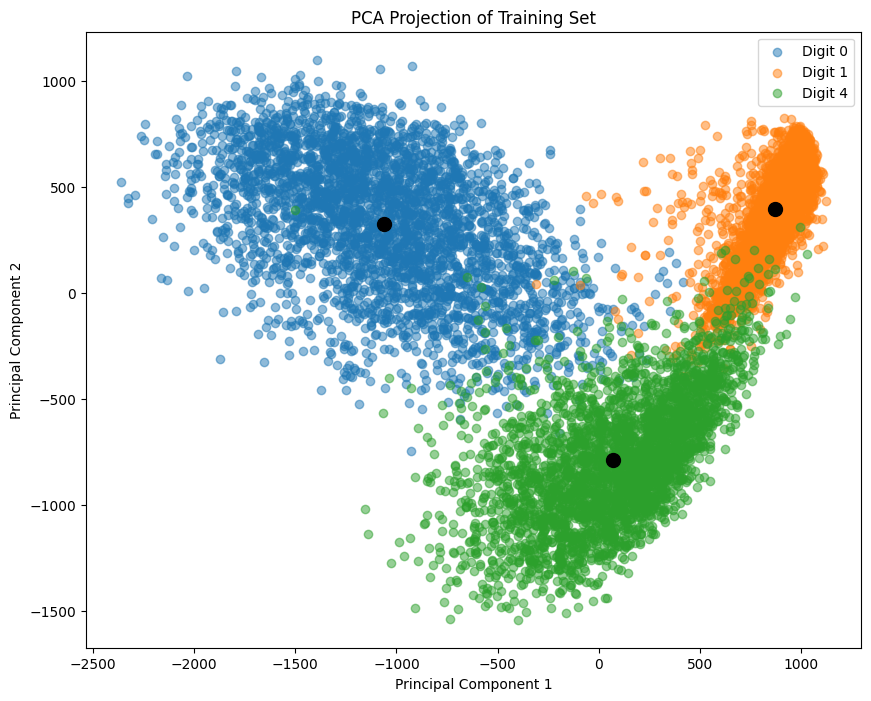

In [13]:

# Visualize the results and the centroids of each cluster
fig, ax = plt.subplots(figsize=(10, 8))
for i, digit in enumerate(digits_to_consider):
    mask = (Y_train == digit)
    ax.scatter(Z_train[mask, 0], Z_train[mask, 1], label=f'Digit {digit}', alpha=0.5)
    centroid = Z_train[mask].mean(axis=0)
    ax.scatter(centroid[0], centroid[1], c='black', s=100, marker='o')
ax.legend()
plt.title('PCA Projection of Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [14]:
def compute_average_distances(Z, Y, digits_to_consider):
    average_distances = []
    for digit in digits_to_consider:
        mask = (Y == digit)
        cluster_points = Z[mask]
        centroid = cluster_points.mean(axis=0)
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        average_distance = distances.mean()
        average_distances.append(average_distance)
        
    return average_distances

In [15]:
# Compute the average distance from each cluster to its centroid for the training set
average_distances_train = compute_average_distances(Z_train, Y_train, digits_to_consider)
print("Training set average distances:")
for digit, distance in zip(digits_to_consider, average_distances_train):
    print(f'Average distance to centroid for digit {digit}: {distance}')

# Manually compute the PCA transformation for the test set using SVD
X_test_centered = X_test - np.mean(X_train, axis=0)
Z_test = np.dot(X_test_centered, principal_components)

# Compute the average distance from each cluster to its centroid for the test set
average_distances_test = compute_average_distances(Z_test, Y_test, digits_to_consider)
print("\nTest set average distances:")
for digit, distance in zip(digits_to_consider, average_distances_test):
    print(f'Average distance to centroid for digit {digit}: {distance}')

Training set average distances:
Average distance to centroid for digit 0: 500.3305090624553
Average distance to centroid for digit 1: 207.58164472671876
Average distance to centroid for digit 4: 396.509869678513

Test set average distances:
Average distance to centroid for digit 0: 500.2826298885566
Average distance to centroid for digit 1: 209.85313835449386
Average distance to centroid for digit 4: 391.9371613901256


In [16]:
# Define a classification algorithm based on the distance to centroids
def classify_digit_PCA(x):
    distances = [np.linalg.norm(x - Z_train[Y_train == digit].mean(axis=0)) for digit in digits_to_consider]
    return digits_to_consider[np.argmin(distances)]

Misclassification Rate: 0.03646237393328167


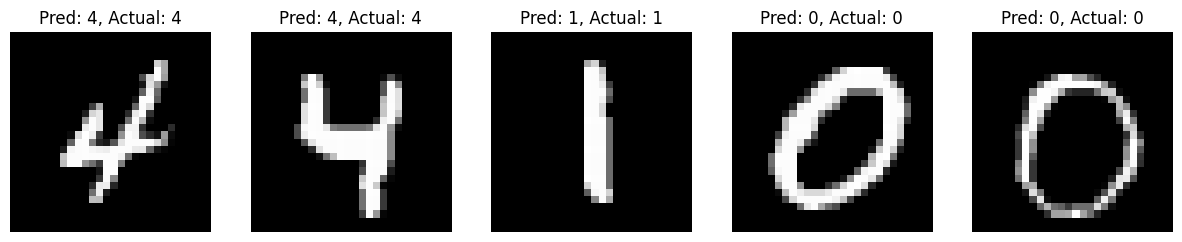

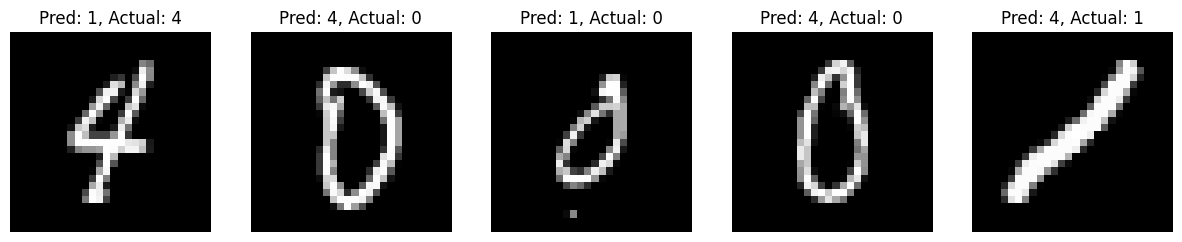

In [19]:

# Predict and compute the misclassification rate
Y_pred = np.array([classify_digit_PCA(Z_test[i]) for i in range(Z_test.shape[0])])
misclassification_rate = 1 - accuracy_score(Y_test, Y_pred)
print(f'Misclassification Rate: {misclassification_rate}')

# Visualize some test images and their predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax in axes:
    i = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {Y_pred[i]}, Actual: {Y_test[i]}')
    ax.axis('off')
plt.show()

# Visualize the wrong predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax in axes:
    i = np.random.choice(np.where(Y_test != Y_pred)[0])
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {Y_pred[i]}, Actual: {Y_test[i]}')
    ax.axis('off')
plt.show()

In [20]:
def pca_clustering_experiment(digits_to_consider, k_values):
    results = []
    for k in k_values:
        # Filter the digits
        mask = np.isin(Y, digits_to_consider)
        X_filtered = X[mask]
        Y_filtered = Y[mask]

        # Split the dataset into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.2, random_state=42)

        # Center the data by subtracting the mean
        X_train_centered = X_train - np.mean(X_train, axis=0)

        # Compute the SVD of the centered data
        _, _, VT = np.linalg.svd(X_train_centered, full_matrices=False)

        # Select the top k principal components
        principal_components = VT[:k].T

        # Project the data onto the principal components
        Z_train = np.dot(X_train_centered, principal_components)

        # Manually compute the PCA transformation for the test set using SVD
        X_test_centered = X_test - np.mean(X_train, axis=0)
        Z_test = np.dot(X_test_centered, principal_components)

        # Define a classification algorithm based on the distance to centroids
        def classify_digit_PCA(x):
            distances = [np.linalg.norm(x - Z_train[Y_train == digit].mean(axis=0)) for digit in digits_to_consider]
            return digits_to_consider[np.argmin(distances)]

        # Predict and compute the misclassification rate
        Y_pred = np.array([classify_digit_PCA(Z_test[i]) for i in range(Z_test.shape[0])])
        accuracy = accuracy_score(Y_test, Y_pred)
        # Store the results
        results.append(accuracy)

    return results

In [21]:
# Define the digits to consider and the values of k to test
digit_tuples = [(0, 1, 4), (2, 3, 5), (0, 8, 9), (1, 4, 7), (3, 6, 8)]
k_values = np.arange(2, 11)

results = [pca_clustering_experiment(digits_to_consider, k_values) for digits_to_consider in digit_tuples]

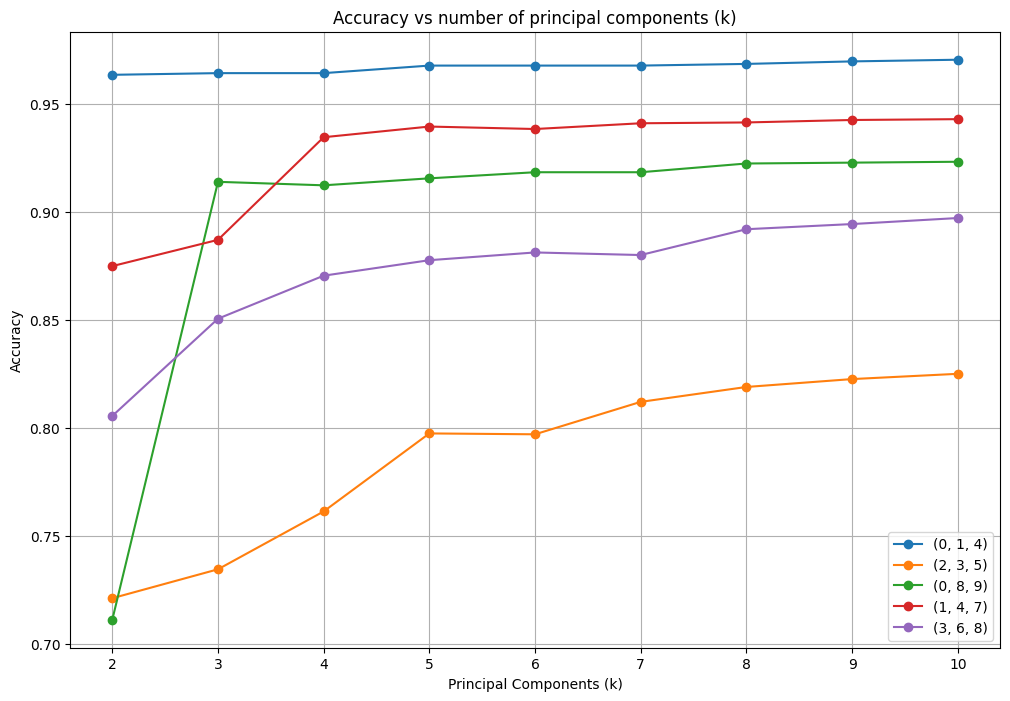

In [23]:
# Plot the results
plt.figure(figsize=(12, 8))
for result, pairs in zip(results, digit_tuples):
    plt.plot(k_values, result, 'o-', label=f'{pairs}')
plt.grid()
plt.xlabel('Principal Components (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs number of principal components (k)')
plt.legend()
plt.show()